In [1]:
import pandas as pd

In [3]:

# Import each CSV as a separate variable
dual_mixed_mean = pd.read_csv('results/dual_mixed_mean.csv', index_col=0)
dual_mixed_sem = pd.read_csv('results/dual_mixed_sem.csv', index_col=0)
dual_random_mean = pd.read_csv('results/dual_random_mean.csv', index_col=0)
dual_random_sem = pd.read_csv('results/dual_random_sem.csv', index_col=0)
dual_sequential_mean = pd.read_csv('results/dual_sequential_mean.csv', index_col=0)
dual_sequential_sem = pd.read_csv('results/dual_sequential_sem.csv', index_col=0)

In [5]:
# Rename columns from 'quadratic_X' to integer X for all dataframes
dataframes = [dual_mixed_mean, dual_mixed_sem, dual_random_mean, 
              dual_random_sem, dual_sequential_mean, dual_sequential_sem]

for df in dataframes:
    rename_dict = {col: int(col.split('_')[1]) for col in df.columns if col.startswith('quadratic_')}
    df.rename(columns=rename_dict, inplace=True)

In [6]:
dual_mixed_mean

,2,5,7,10,15,20,25,30,35
linear_examples,,,,,,,,,
0,0.840332,0.053383,0.032596,0.019550,0.010195,0.009642,0.007941,0.010047,0.011573
2,2.257584,1.564190,0.552287,0.349286,0.180654,0.135932,0.074970,0.056674,0.145323
5,2.789453,1.571746,1.359306,0.728641,0.475031,0.443237,0.264249,0.279293,0.308051
7,2.502148,1.882201,1.198004,1.189554,1.165431,0.653474,0.298401,0.325301,2.585980
10,3.065110,2.024543,1.744096,1.182943,1.038394,0.555181,0.718735,0.529109,2.366916
15,3.665877,2.380929,2.471100,1.739259,1.277071,1.223216,1.186561,2.294106,2.285226
20,3.326652,3.121602,2.433128,2.023525,1.573645,1.471524,3.038599,2.416635,2.670884
25,3.757317,3.275222,3.207047,2.397372,1.751870,2.669861,1.996093,2.525230,2.532775
30,4.005766,3.267591,3.242551,2.140619,2.626690,3.312036,2.868974,3.178382,2.832652


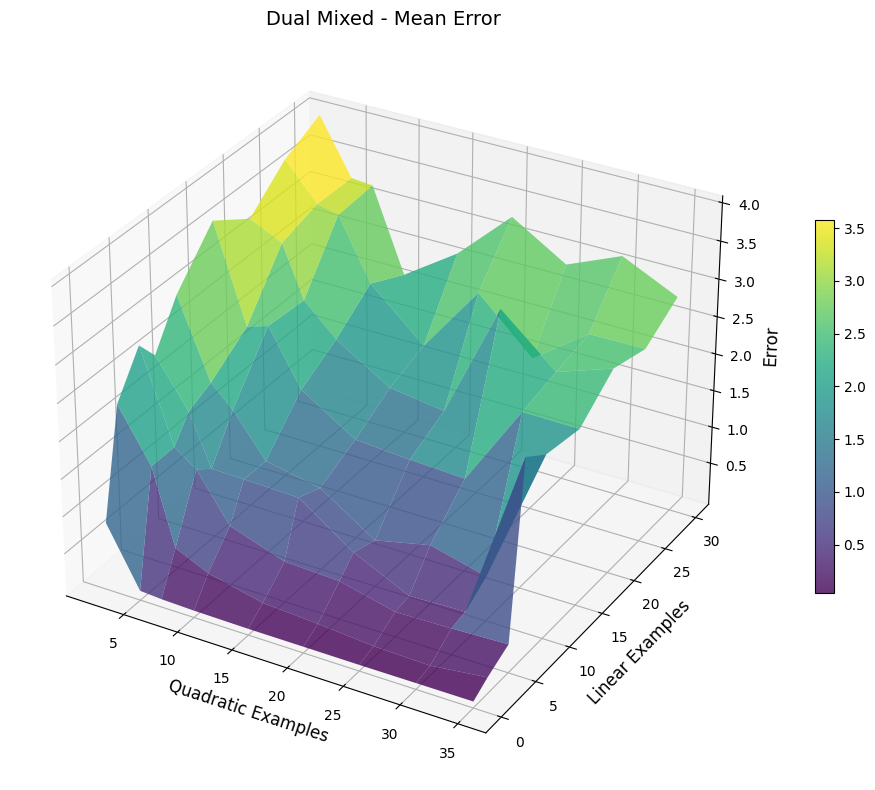

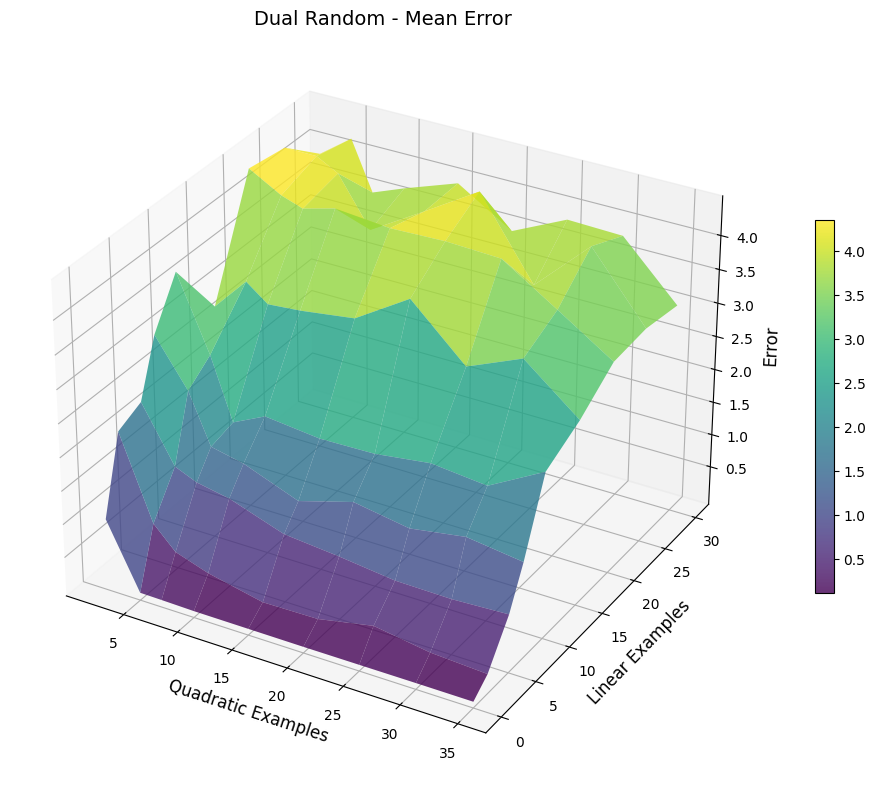

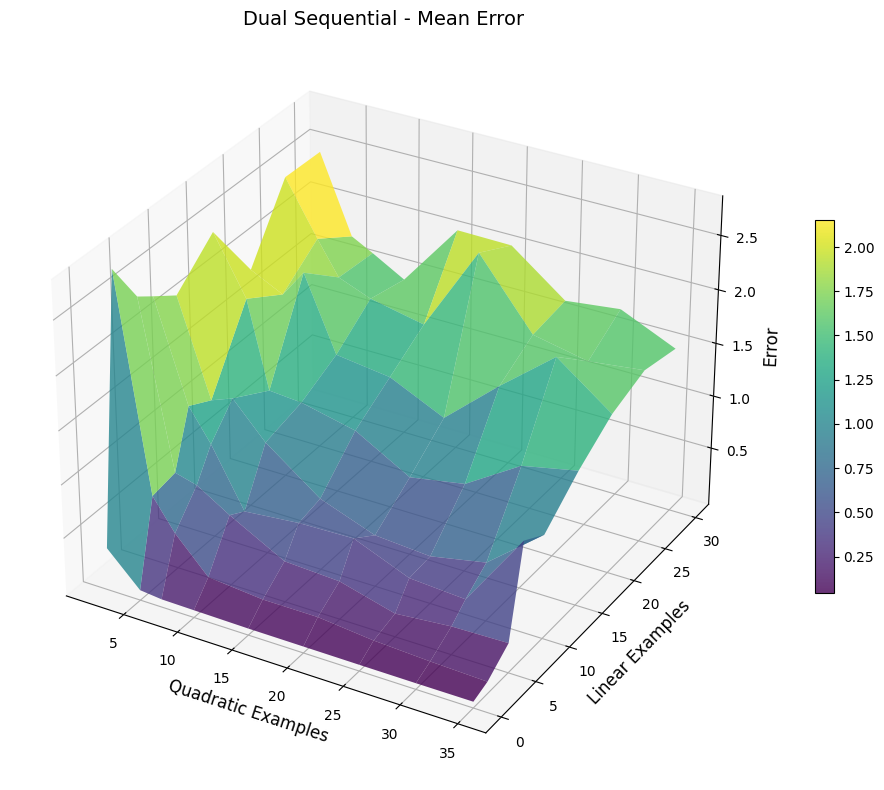

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d_surface(df, title='3D Error Surface'):
    """
    Plot a 3D surface where:
    - X axis = quadratic examples (column names)
    - Y axis = linear examples (row index)
    - Z axis = error values
    """
    # Get the data
    linear_examples = df.index.values  # Y axis
    quadratic_examples = df.columns.values  # X axis
    
    # Create meshgrid
    X, Y = np.meshgrid(quadratic_examples, linear_examples)
    
    # Get Z values (errors)
    Z = df.values
    
    # Create figure and 3D axis
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
    
    # Labels
    ax.set_xlabel('Quadratic Examples', fontsize=12)
    ax.set_ylabel('Linear Examples', fontsize=12)
    ax.set_zlabel('Error', fontsize=12)
    ax.set_title(title, fontsize=14)
    
    # Add colorbar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20)
    
    plt.tight_layout()
    plt.show()

# Plot for each dataframe
plot_3d_surface(dual_mixed_mean, 'Dual Mixed - Mean Error')
plot_3d_surface(dual_random_mean, 'Dual Random - Mean Error')
plot_3d_surface(dual_sequential_mean, 'Dual Sequential - Mean Error')